In [63]:
import cv2
import pytesseract
from pytesseract import Output
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from ocrutils.imageops import is_a_picture, prepare_image

Carregando imagem

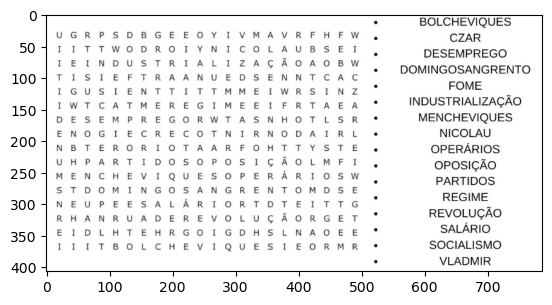

In [64]:
path_data = Path.cwd().joinpath('data','teste.png')
img = cv2.imread(str(path_data.resolve()))
plt.imshow(img)

config tesseract

In [65]:
tessdata_dir = Path.cwd().joinpath('tessdata')
whitelist = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789áàâãéêíóôõúüçÁÀÂÃÉÊÍÓÔÕÚÜÇ"
blacklist = " "
config_shotScream = f'--psm 11 --tessdata-dir {tessdata_dir} -c tessedit_char_whitelist={whitelist} -c tessedit_char_blacklist={blacklist}'
config_picture = f'--psm 11 --tessdata-dir {tessdata_dir} -c tessedit_char_whitelist={whitelist} -c tessedit_char_blacklist={blacklist}'


Gray + threshold

In [66]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

Reconhecimento das regiões

In [67]:
if (not is_a_picture(img)):
    img_data = pytesseract.image_to_data(img, config=config_shotScream, lang ='por', output_type=Output.DICT)
    color = ()
else:
    img = prepare_image(img)
    img_data = pytesseract.image_to_data(img, config=config_picture, lang ='por', output_type=Output.DICT)

563 6 768 397
787 407


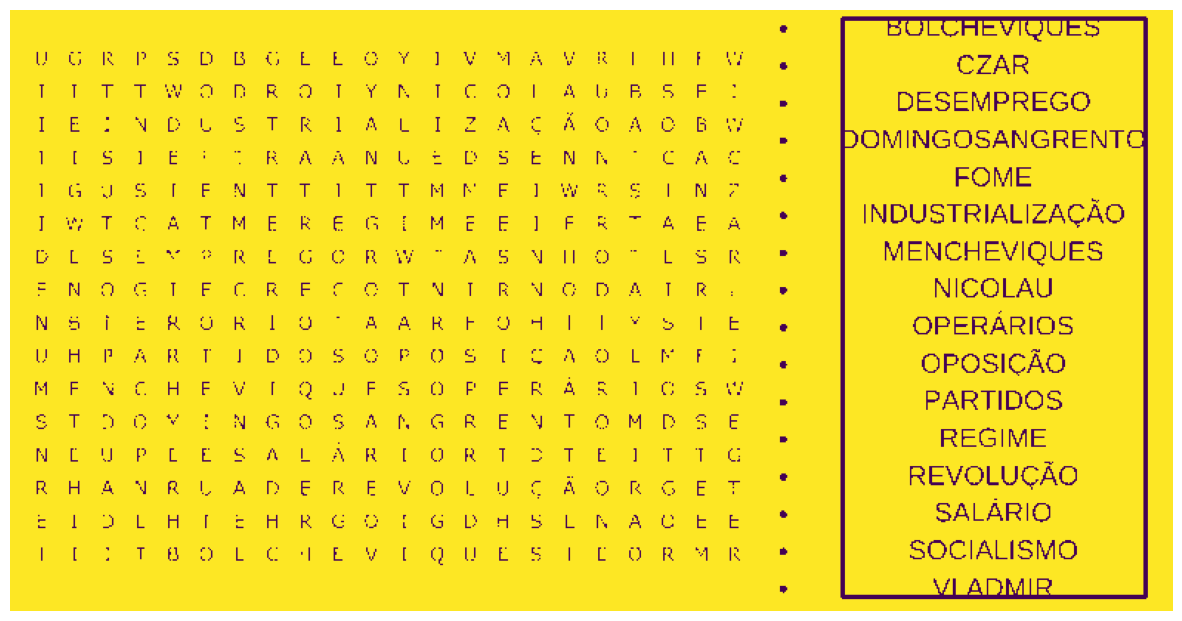

In [ ]:
def detect_words_area(data: dict, img):
    img_h, img_w = img.shape[:2]  # altura, largura
    chaves = list(data.keys())
    size = len(data[chaves[0]])
    left_min, top_min, bottom_max, right_max = img_w, img_h, 0, 0

    for i in range(size):
        if len(data['text'][i]) > 3:
            x = data['left'][i]
            y = data['top'][i]
            w = data['width'][i]
            h = data['height'][i]
            
            left_min = min(left_min, x)
            top_min = min(top_min, y)
            right_max = max(right_max, x + w)
            bottom_max = max(bottom_max, y + h)

    return left_min, top_min, right_max, bottom_max

x1, y1, x2, y2 = detect_words_area(img_data, img)
y, x = img.shape[:2]
print(x1, y1, x2, y2)
print(x, y)

cv2.rectangle(img, (x1, y1), (x2, y2), 0, 2)

plt.figure(figsize=(15, 12))
plt.imshow(img)
plt.axis('off')
plt.show()   